In [ ]:
import torch
from torch.utils.data import Dataset

In [ ]:
# custom dataset

class MyDataset(Dataset):
  def __init__(self):
    self.X =  torch.arange(10, dtype = torch.float32).reshape(-1,1)
    self.Y =  self.X*2 +1 # y = 2x+1

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.Y[index]


In [ ]:
# Wrap and DataLoader
from torch.utils.data import DataLoader
dataset = MyDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
for batch_X, batch_Y in dataloader:
  print(batch_X)
  print(batch_Y)
  print("----")


tensor([[4.],
        [3.]])
tensor([[9.],
        [7.]])
----
tensor([[6.],
        [8.]])
tensor([[13.],
        [17.]])
----
tensor([[0.],
        [2.]])
tensor([[1.],
        [5.]])
----
tensor([[1.],
        [9.]])
tensor([[ 3.],
        [19.]])
----
tensor([[7.],
        [5.]])
tensor([[15.],
        [11.]])
----


In [ ]:
from torch.utils.data import DataLoader
dataset = MyDataset()
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
for batch_X, batch_Y in dataloader:
  print(batch_X)
  print(batch_Y)
  print("----")

tensor([[7.],
        [3.],
        [9.],
        [2.]])
tensor([[15.],
        [ 7.],
        [19.],
        [ 5.]])
----
tensor([[0.],
        [6.],
        [4.],
        [5.]])
tensor([[ 1.],
        [13.],
        [ 9.],
        [11.]])
----
tensor([[8.],
        [1.]])
tensor([[17.],
        [ 3.]])
----


In [ ]:
import torchvision.datasets as datasets

print([attr for attr in dir(datasets) if isinstance(getattr(datasets, attr), type)])

['CIFAR10', 'CIFAR100', 'CLEVRClassification', 'CREStereo', 'Caltech101', 'Caltech256', 'CarlaStereo', 'CelebA', 'Cityscapes', 'CocoCaptions', 'CocoDetection', 'Country211', 'DTD', 'DatasetFolder', 'EMNIST', 'ETH3DStereo', 'EuroSAT', 'FER2013', 'FGVCAircraft', 'FakeData', 'FallingThingsStereo', 'FashionMNIST', 'Flickr30k', 'Flickr8k', 'Flowers102', 'FlyingChairs', 'FlyingThings3D', 'Food101', 'GTSRB', 'HD1K', 'HMDB51', 'INaturalist', 'ImageFolder', 'ImageNet', 'Imagenette', 'InStereo2k', 'KMNIST', 'Kinetics', 'Kitti', 'Kitti2012Stereo', 'Kitti2015Stereo', 'KittiFlow', 'LFWPairs', 'LFWPeople', 'LSUN', 'LSUNClass', 'MNIST', 'Middlebury2014Stereo', 'MovingMNIST', 'Omniglot', 'OxfordIIITPet', 'PCAM', 'PhotoTour', 'Places365', 'QMNIST', 'RenderedSST2', 'SBDataset', 'SBU', 'SEMEION', 'STL10', 'SUN397', 'SVHN', 'SceneFlowStereo', 'Sintel', 'SintelStereo', 'StanfordCars', 'UCF101', 'USPS', 'VOCDetection', 'VOCSegmentation', 'VisionDataset', 'WIDERFace']


In [ ]:
help(datasets.CIFAR10)

Help on class CIFAR10 in module torchvision.datasets.cifar:

class CIFAR10(torchvision.datasets.vision.VisionDataset)
 |  CIFAR10(root: Union[str, pathlib.Path], train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |  
 |  `CIFAR10 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.
 |  
 |  Args:
 |      root (str or ``pathlib.Path``): Root directory of dataset where directory
 |          ``cifar-10-batches-py`` exists or will be saved to if download is set to True.
 |      train (bool, optional): If True, creates dataset from training set, otherwise
 |          creates from test set.
 |      transform (callable, optional): A function/transform that takes in a PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_transform (callable, optional): A function/transform that takes in the
 |          target and transforms it.
 |      download (bool, option

In [ ]:
# load built in data
# 1. import
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [ ]:
# 2. load data
transform = transforms.Compose([
    transforms.ToTensor(),  # convert image to tensor
    transforms.Normalize((0.5,),(0.5,))# normalize the images
    ])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

100%|██████████| 170M/170M [00:10<00:00, 15.5MB/s]


In [ ]:
import matplotlib.pyplot as plt

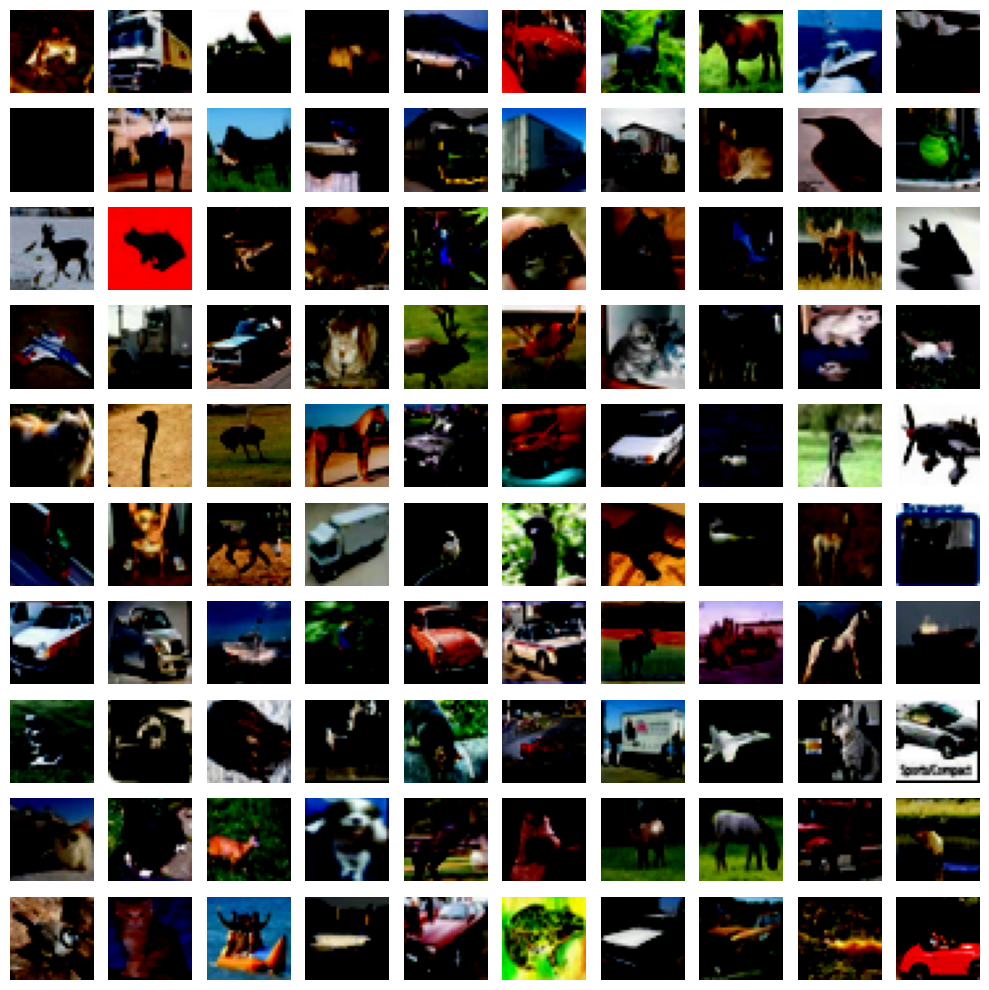

In [ ]:
# visualize the subset of dataset

num_image  = 100
train_loader = DataLoader(train_dataset, batch_size=num_image, shuffle=False)

images, labels = next(iter(train_loader))
images = images.numpy().transpose((0,2,3,1)) # b,c,h,w to b,h,w,c => visualization
plt.figure(figsize = (10,10))
for i in range(num_image):
  plt.subplot(10,10,i+1)
  plt.imshow(images[i])
  plt.axis('off')

plt.tight_layout()
plt.show()



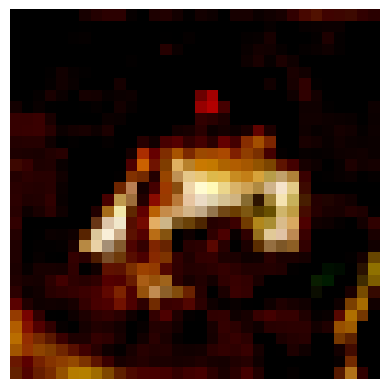

In [ ]:
# indivi

img = images[0] # batch first
label = labels[0].item()

#img= (img*0.5)+0.5 # scale back

# show
plt.imshow(img)
plt.axis('off')
plt.show()
